In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import lane_detection
import lane_following
from dt_apriltags import Detector

In [2]:
my_img = cv2.imread('pool_lanes.png')
test_img = cv2.imread('pool_lanes.png')
lane_img = cv2.imread('pool_lanes.png')
center_lane_img = cv2.imread('pool_lanes.png')

In [3]:
gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#plt.imshow(gray)

In [4]:
edges = cv2.Canny(gray,0, 45, apertureSize=3) # detect edges
#plt.imshow(edges)

In [5]:
'''lines = cv2.HoughLinesP(
                edges,
                rho=1,
                theta=np.pi/180,
                threshold=100,
                minLineLength=100,
                maxLineGap=30,
        ) 
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(test_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(test_img)'''


'lines = cv2.HoughLinesP(\n                edges,\n                rho=1,\n                theta=np.pi/180,\n                threshold=100,\n                minLineLength=100,\n                maxLineGap=30,\n        ) \nfor line in lines:\n    x1, y1, x2, y2 = line[0]\n    cv2.line(test_img, (x1, y1), (x2, y2), (0, 255, 0), 2)\n\nplt.imshow(test_img)'

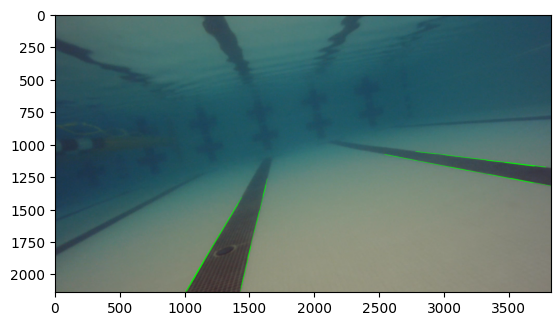

In [6]:
linelist = lane_detection.detect_lines(my_img, 0, 45, 3, 100, 10)
new_line_img = lane_detection.draw_lines(my_img,linelist)
plt.imshow(cv2.cvtColor(new_line_img,cv2.COLOR_BGR2RGB))

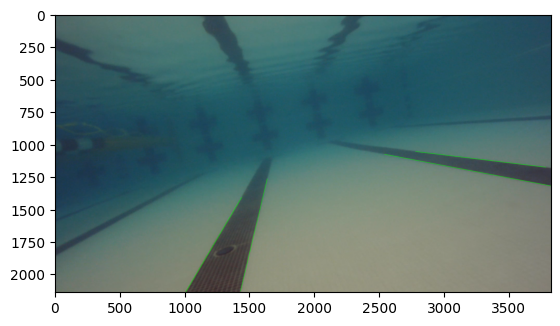

In [7]:
lanelist = lane_detection.detect_lanes(linelist)
new_lane_img = lane_detection.draw_lanes(lane_img,lanelist)
plt.imshow(cv2.cvtColor(new_lane_img,cv2.COLOR_BGR2RGB))




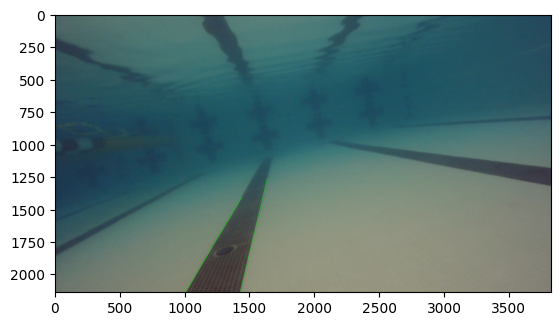

In [8]:
closest_lane = lane_following.get_lane_center(lanelist)
center_lane_image = lane_detection.draw_lanes(center_lane_img,closest_lane)
plt.imshow(cv2.cvtColor(center_lane_img,cv2.COLOR_BGR2RGB))